#1. PERKENALAN

In [ ]:
'''
Nama      : Rugaya Muksin BSA
Batch     : 006
Phase     : 1
Live Code : 1

'''

#2. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('fivethirtyeight')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

#3. DATA LOADING

In [24]:
lin_df_ori = pd.read_csv('insurance.csv')
log_df_ori = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/GalaxyMorphology.csv')

In [25]:
lin_df_ori.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
log_df_ori.head(5)

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
0,0,1.854829,6.560199,0.357051,0.932151,0.850992,1.588183,0.697214,1
1,1,4.815538,25.950829,0.313292,0.610999,0.723122,1.533653,0.719412,1
2,2,0.678056,6.867416,0.408286,0.881524,0.813231,1.743747,0.750872,1
3,3,-0.547708,11.877941,-9999.999999,0.838779,0.816965,1.672529,0.771995,1
4,4,2.028543,20.458965,0.446453,0.839216,0.801140,1.107665,0.610453,1


In [28]:
lin_df = lin_df.copy()
log_df = log_df.copy()

In [29]:
print(lin_df.shape)
print(log_df.shape)

(1338, 7)
(20000, 9)


Terdapat 1338 data dengan 7 informasi dari dataset yang akan digunakan dalam kasus linear regression.

Terdapat 20000 data dengan 9 informasi dari dataset yang akan digunakan dalam kasus logistic regression.

#3. DATA CLEANING

###3.1 DATASET FOR LINEAR REGRESSION CASE

In [5]:
lin_df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [6]:
'''
Cek apakah terdapat missing value pada dataset yang akan diolah

'''

pd.DataFrame({
    'missing value': lin_df.isnull().sum()
})

,missing value
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Tidak terdapat missing value pada dataset yang akan digunakan untuk linear regression case

###3.2 DATASET FOR LOGISTIC REGRESSION CASE

In [7]:
log_df.info

<bound method DataFrame.info of        Unnamed: 0     TType          K  ...        G2         H  CNN2classes1stClass
0               0  1.854829   6.560199  ...  1.588183  0.697214                    1
1               1  4.815538  25.950829  ...  1.533653  0.719412                    1
2               2  0.678056   6.867416  ...  1.743747  0.750872                    1
3               3 -0.547708  11.877941  ...  1.672529  0.771995                    1
4               4  2.028543  20.458965  ...  1.107665  0.610453                    1
...           ...       ...        ...  ...       ...       ...                  ...
19995       19995  4.631655  29.018608  ...  1.611594  0.735315                    1
19996       19996 -2.179893  15.245582  ...  1.313089  0.649996                    1
19997       19997  1.876151   6.907812  ...  1.406042  0.671217                    1
19998       19998  5.053256  27.981613  ...  1.659363  0.379448                    1
19999       19999 -0.558501   6.5

In [42]:
renamed_log_df = log_df.rename(
    columns = {'CNN2classes1stClass' : 'GalaxyClass'}
)

renamed_log_df.head()

,Unnamed: 0,TType,K,C,A,S,G2,H,GalaxyClass
0,0,1.854829,6.560199,0.357051,0.932151,0.850992,1.588183,0.697214,1
1,1,4.815538,25.950829,0.313292,0.610999,0.723122,1.533653,0.719412,1
2,2,0.678056,6.867416,0.408286,0.881524,0.813231,1.743747,0.750872,1
3,3,-0.547708,11.877941,-9999.999999,0.838779,0.816965,1.672529,0.771995,1
4,4,2.028543,20.458965,0.446453,0.839216,0.801140,1.107665,0.610453,1


In [43]:
log_df = renamed_log_df

In [44]:
'''
Cek apakah terdapat missing value pada dataset yang akan diolah

'''

pd.DataFrame({
    'missing value': log_df.isnull().sum()
})

,missing value
Unnamed: 0,0
TType,0
K,0
C,0
A,0
S,0
G2,0
H,0
GalaxyClass,0


Tidak terdapat missing value pada dataset yang akan digunakan untuk linear regression case

#4. EDA

###4.1 MEMISAHKAN TERGET, FITUR NUMERIK DAN NON NUMERIK (KATEGORIKAL)

4.1.1 Linear regression

In [51]:
target_lin = ['bmi']
cat_feature_lin = ['sex', 'smoker', 'region']
num_feature_lin = [i for i in lin_df.columns if i not in (cat_feature+target)]

4.1.2 Logistic Regression

In [57]:
target_log = ['GalaxyClass']
log_feature = ['C', 'A', 'S', 'G2', 'H']

###4.2 DATASET FOR LINEAR REGRESSION CASE

In [18]:
lin_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


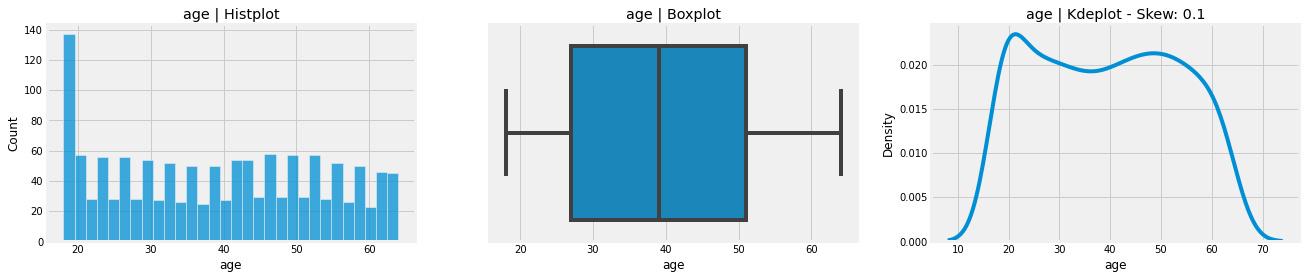

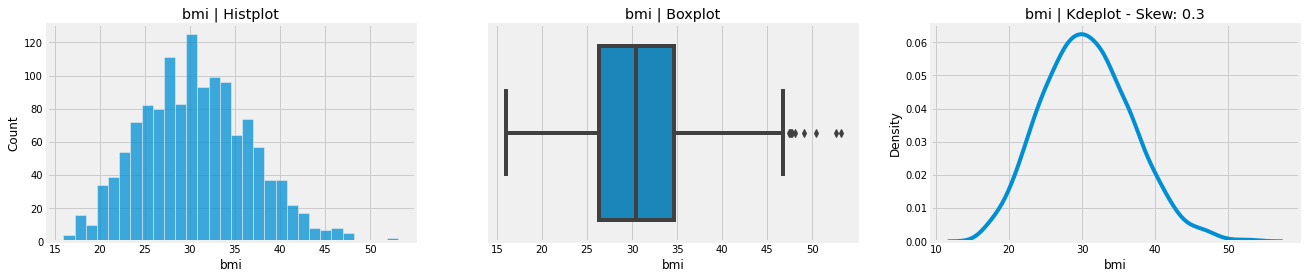

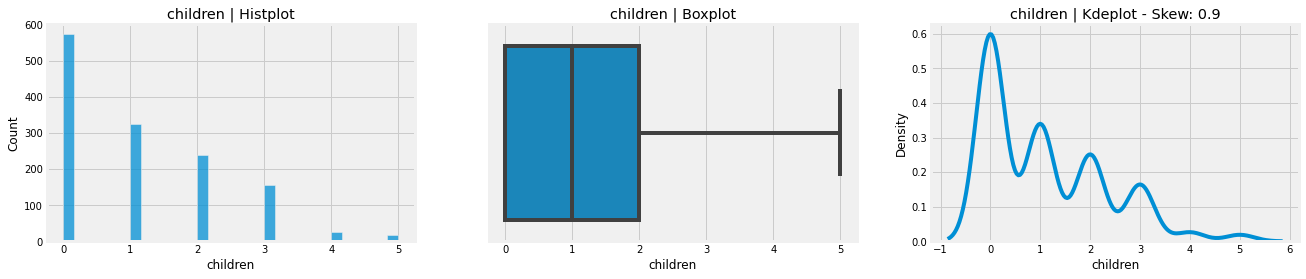

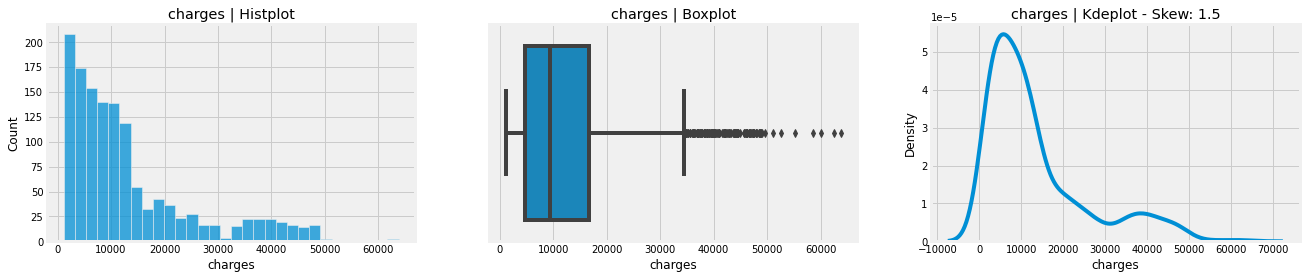

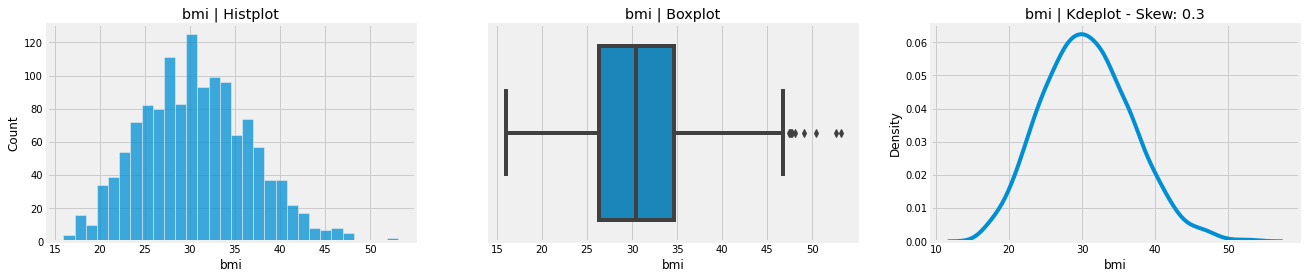

In [53]:
'''
Melihat jenis distribusi data dan outlier dari visualisasi dataset yang 
digunakan dalam kasus linear regression

'''


for i in lin_df[num_feature_lin+target_lin].columns:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=lin_df[i],ax=ax[0], bins=30)
    sns.boxplot(x=lin_df[i], ax=ax[1])
    sns.kdeplot(lin_df[i], ax=ax[2])
    skew_val=round(lin_df[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

Dari hasil visualisasi tampaknya:
*   Distribusi data pada variabel **age** dan **bmi** tampaknya memiliki distribusi data normal. Distribusi data pada variabel **children** dan **charges** memiliki distribusi data yang agak miring/skewed.
*   Dari hasil distribusi data tampaknya variabel bmi dan charges mengandung outlier



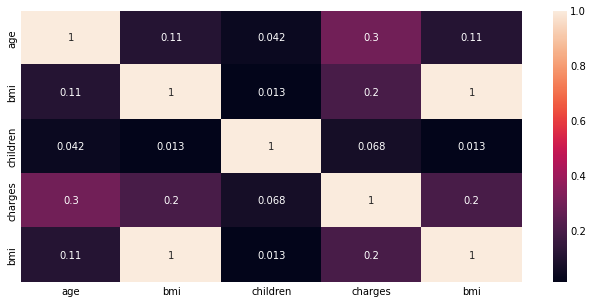

In [54]:
'''
Heatmap untuk pengecekan correlation

'''

plt.figure(figsize=(10, 5))
sns.heatmap(lin_df[num_feature_lin+target_lin].corr().abs(),  annot=True)
plt.show()

**Kolom charges memiliki skor korelasi yang cukup dengan bmi dan merupakan indikasi yang baik untuk digunakan sebagai prediktor.** Kemudian disusul oleh nilai dari variabel age dan children.

###4.2 DISTRIBUSI DATASET FOR LOGISTIC REGRESSION CASE

In [58]:
log_df[log_feature+target_log].describe()

,C,A,S,G2,H,GalaxyClass
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-1846.175115,0.323992,-3.220560,0.747130,0.655137,0.807200
std,3880.385347,70.716614,199.980672,70.720857,0.113237,0.394507
min,-9999.999999,-9999.999999,-9999.999999,-9999.999999,0.017008,0.000000
25%,0.292831,0.782718,0.757618,0.979765,0.585356,1.000000
50%,0.365902,0.859172,0.844121,1.364905,0.659603,1.000000
75%,0.437227,0.905404,0.889421,1.606039,0.743029,1.000000
max,0.761184,0.986535,0.979032,1.953389,0.929947,1.000000


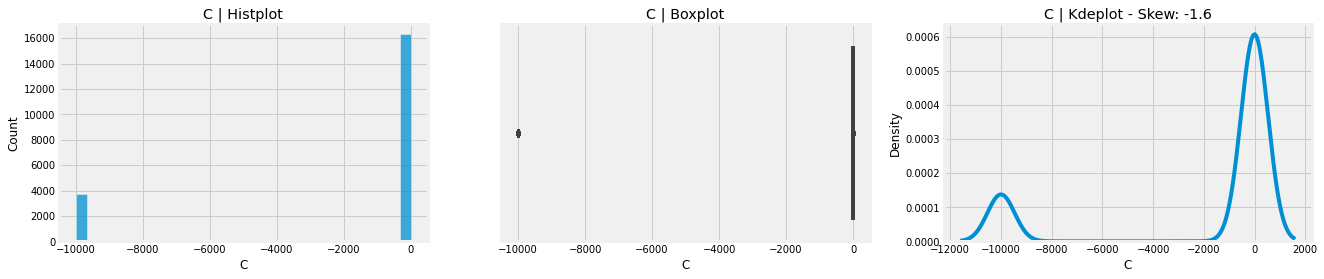

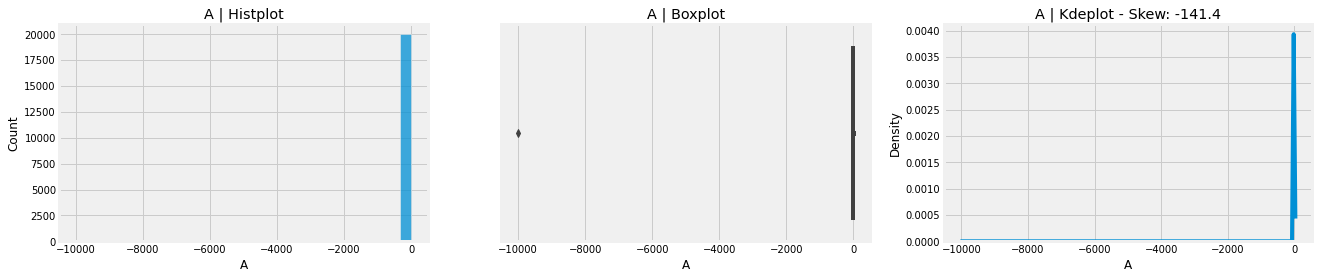

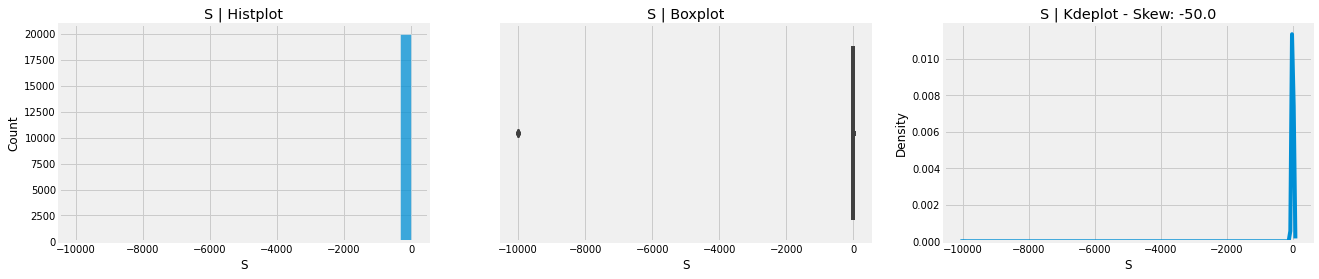

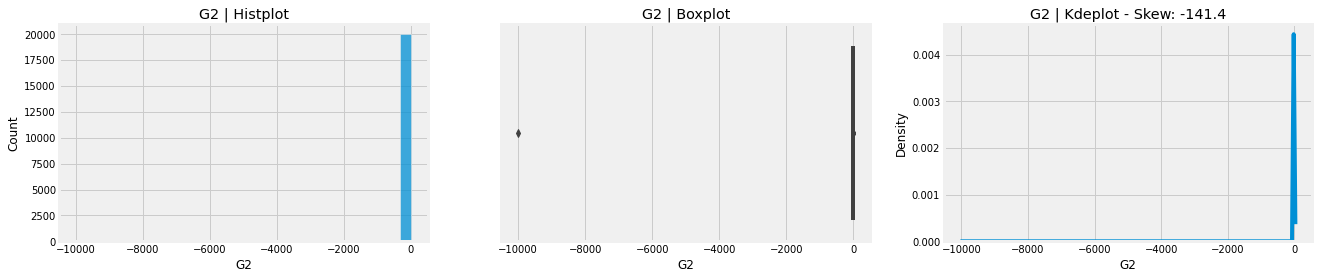

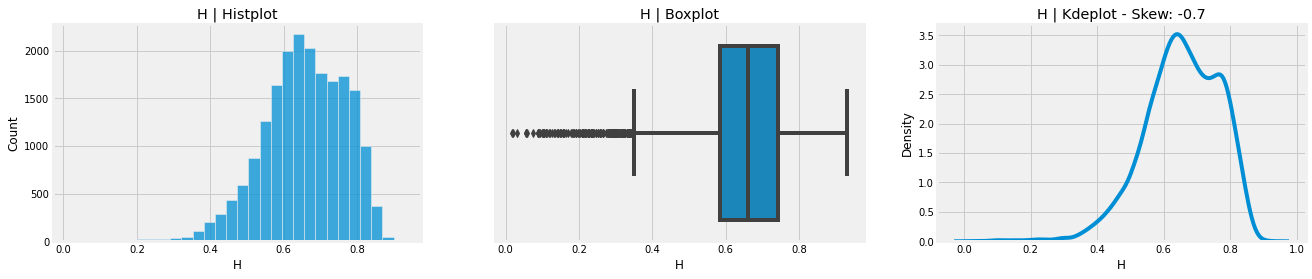

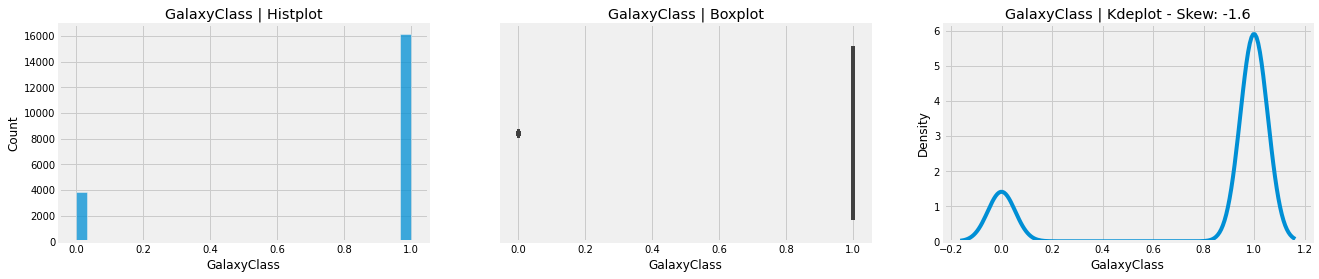

In [59]:
'''
Melihat jenis distribusi data dan outlier dari visualisasi dataset yang 
digunakan dalam kasus linear regression

'''


for i in log_df[log_feature+target_log].columns:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=log_df[i],ax=ax[0], bins=30)
    sns.boxplot(x=log_df[i], ax=ax[1])
    sns.kdeplot(log_df[i], ax=ax[2])
    skew_val=round(log_df[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

Dari hasil visualisasi tampaknya:
*   Distribusi data pada variabel **A, S, G2 dan H** memiliki distribusi data yang miring/skewed. Distribusi data pada variabel C adalah bimodel.
*   Dari hasil distribusi data tampaknya semua variabel mengandung outlier



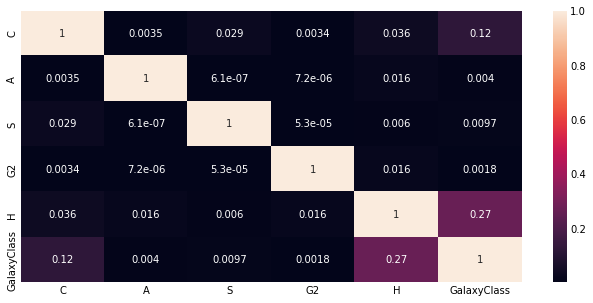

In [60]:
'''
Heatmap untuk pengecekan correlation

'''

plt.figure(figsize=(10, 5))
sns.heatmap(log_df[log_feature+target_log].corr().abs(),  annot=True)
plt.show()

**Kolom H dan C memiliki skor korelasi yang cukup dengan GalaxyClass dan merupakan indikasi yang baik untuk digunakan sebagai prediktor.** Kemudian disusul oleh nilai dari variabel A, G2 dan S.

#5. PREPROCESSING DATA

###5.1 HANDLING OUTLIER

Saya memutuskan untuk handling outlier menggunakan trimming jika presentase outliernya sama dengan atau dibawah 3% dan menggunakn capping jika presentase outliernya diatas 3%.

**Saya menetapkan presentase outlier pada trimming sangat kecil dikarenakan semakin besar presentase data yang dipangkas akan berpengaruh pada performansi model yang dihasilkan.**

#####5.1.1 Linear Regression Dataset

In [95]:
'''
Dari hasil visualiasi outlier tampaknya terdapat outlier pada
beberapa variabel yang ada pada fitur numerik.

Menampilkan presentasi outlier pada variabel yang ada pada fitur numerik.

'''
 
for k, v in lin_df[num_feature_lin+target_lin].items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(lin_df[num_feature_lin])[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 0.00%
Column bmi outliers = 0.67%
Column children outliers = 1.35%
Column charges outliers = 10.39%
Column bmi outliers = 0.67%


######HANDLING OUTLIER USING CAPPING

**Saya menggunakan capping untuk menghandle variabel yang mengandung outlier dengan presentase outlier diatas 3%**

Column charges outliers = 10.39%

In [96]:
!pip install feature-engine
from feature_engine.outliers import Winsorizer

# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['charges'])

windsoriser.fit(lin_df)

lin_df_t = windsoriser.transform(lin_df)

In [97]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'charges': -13109.1508975}
Right Tail Caps :  {'charges': 34489.350562499996}


In [98]:
print('Numerik Fitur Dataframe Linear Regression - Before Capping')
print(lin_df.describe())
print('')
print('Numerik Fitur Dataframe Linear Regression - After Capping')
print(lin_df_t.describe())

Numerik Fitur Dataframe Linear Regression - Before Capping
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Numerik Fitur Dataframe Linear Regression - After Capping
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  12479.369251
std      14.049960     6.098187     1.205493  10158.056096
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.2871

In [99]:
# Function to create histogram and boxplot.
# Function takes a dataframe (df) and the variable of interest as arguments

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Charges - Before Capping


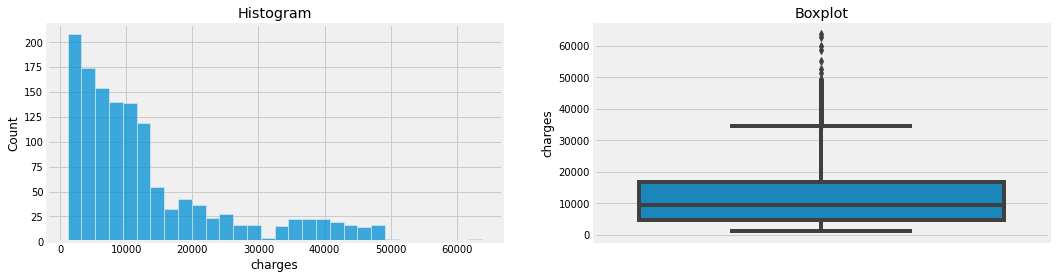

\Charges - After Capping


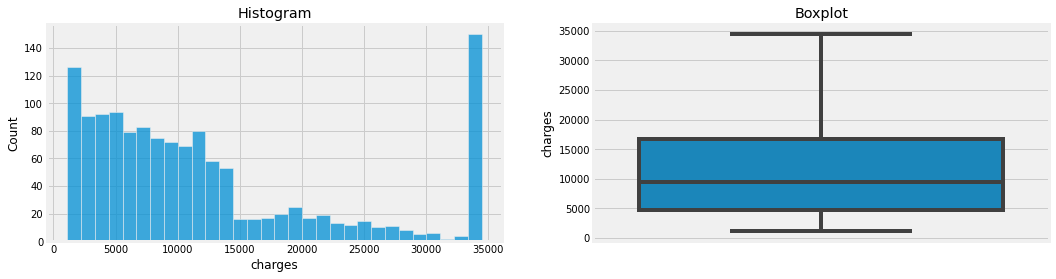

In [100]:
# Let's find outliers in `charges`

print('Charges - Before Capping')
diagnostic_plots(lin_df, 'charges')
print('\Charges - After Capping')
diagnostic_plots(lin_df_t, 'charges')

######HANDLING OUTLIER USING TRIMMING

**Saya menggunakan trimming untuk menghandle variabel yang mengandung outlier dengan presentase outlier sama dengan dan dibawah 3%**

Column age outliers = 0.00%

Column bmi outliers = 0.67%

Column children outliers = 1.35%


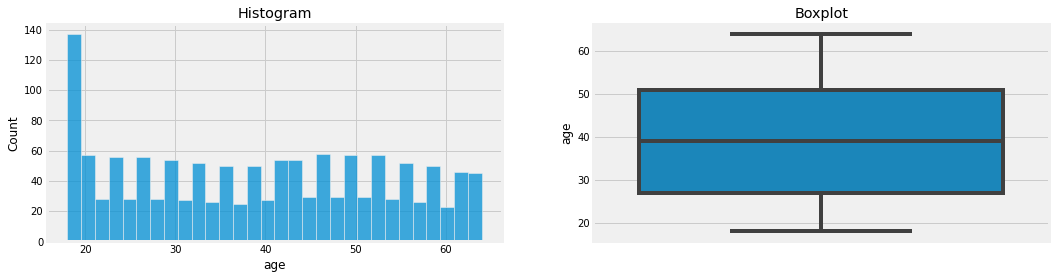

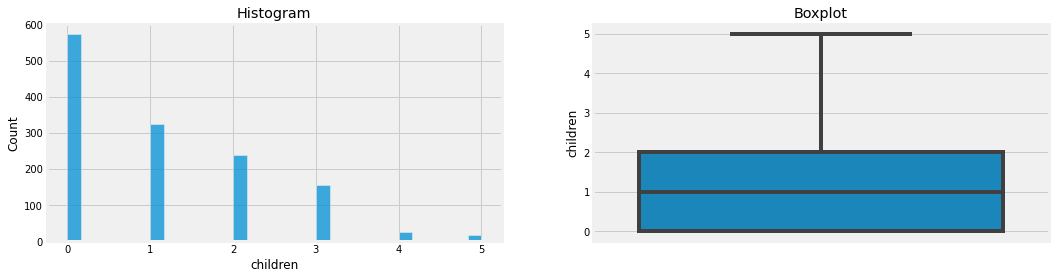

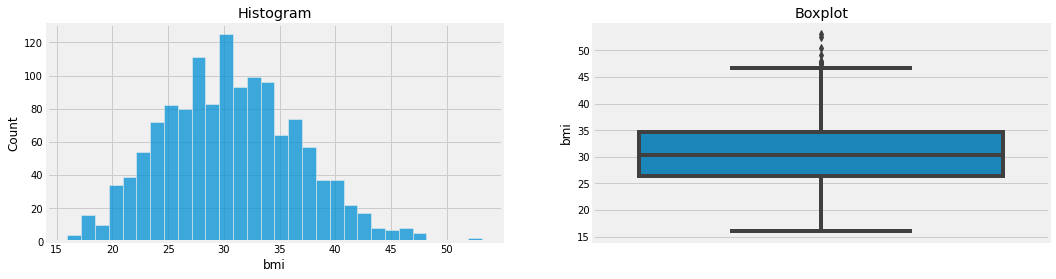

In [101]:
# Let's find outliers in `age`, `bmi`, `children`

diagnostic_plots(lin_df, 'age')
diagnostic_plots(lin_df, 'children')
diagnostic_plots(lin_df, 'bmi')

In [102]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [103]:
# Limits for `age`
age_upper_limit, age_lower_limit = find_skewed_boundaries(lin_df, 'age', 1.5)
age_upper_limit, age_lower_limit

# Limits for `children`
children_upper_limit, children_lower_limit = find_skewed_boundaries(lin_df, 'children', 1.5)
children_upper_limit, children_lower_limit

# Limits for `bmi`
bmi_upper_limit, bmi_lower_limit = find_skewed_boundaries(lin_df, 'bmi', 1.5)
bmi_upper_limit, bmi_lower_limit

print('age_upper_limit : ', age_upper_limit)
print('age_lower_limit : ', age_lower_limit, '\n')
print('children_upper_limit : ', children_upper_limit)
print('children_lower_limit : ', children_lower_limit, '\n')
print('bmi_upper_limit : ', bmi_upper_limit)
print('bmi_lower_limit : ', bmi_lower_limit)

age_upper_limit :  87.0
age_lower_limit :  -9.0 

children_upper_limit :  5.0
children_lower_limit :  -3.0 

bmi_upper_limit :  47.290000000000006
bmi_lower_limit :  13.7


In [104]:
# Flag the outliers in category `age`
outliers_age = np.where(lin_df['age'] > age_upper_limit, True,
                       np.where(lin_df['age'] < age_lower_limit, True, False))

# Flag the outliers in category `children`
outliers_children = np.where(lin_df['children'] > children_upper_limit, True,
                       np.where(lin_df['children'] < children_lower_limit, True, False))

# Flag the outliers in category `bmi`
outliers_bmi = np.where(lin_df['bmi'] > bmi_upper_limit, True,
                       np.where(lin_df['bmi'] < bmi_lower_limit, True, False))

print(outliers_age[:10])

[False False False False False False False False False False]


In [105]:
# Let's trimm the dataset

lin_df_trimmed = lin_df.loc[~(outliers_age + outliers_children + outliers_bmi)]
print('Size dataset - Before trimming : ', lin_df.shape)
print('Size dataset - After trimming  : ', lin_df_trimmed.shape)

Size dataset - Before trimming :  (1338, 7)
Size dataset - After trimming  :  (1329, 7)


setelah ditrim variabel pada fitur numerik menghilangkan 9 data atau sekitar 0,6% data dari dataset yang digunakan.

age - Before Trimming


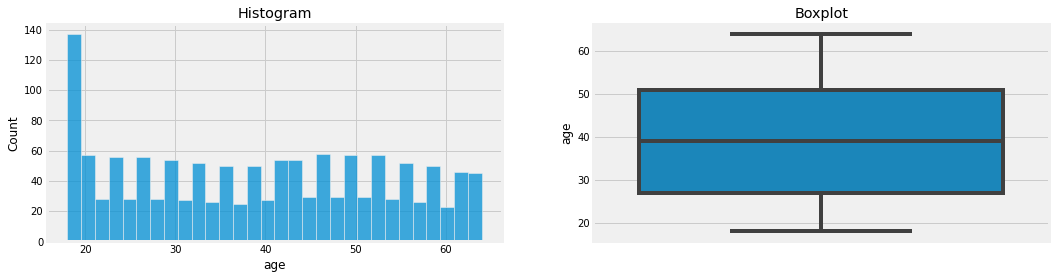


age - After Trimming


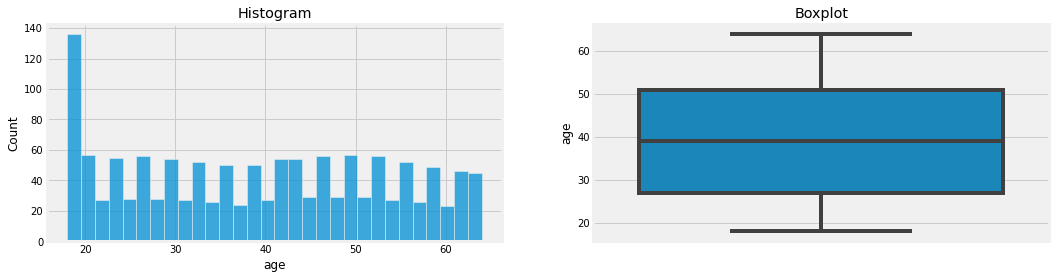

\children - Before Trimming


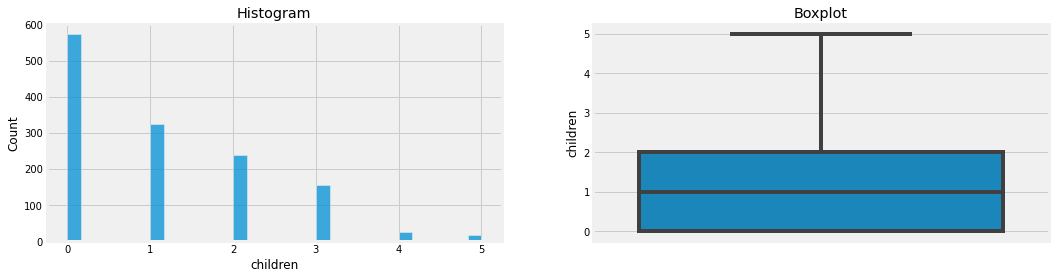

\children - After Trimming


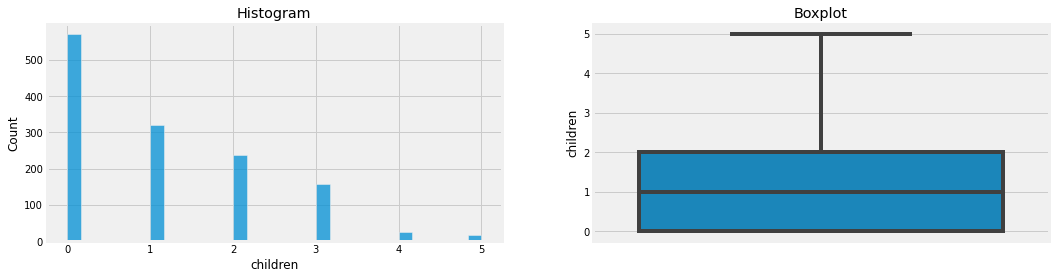


bmi - Before Trimming


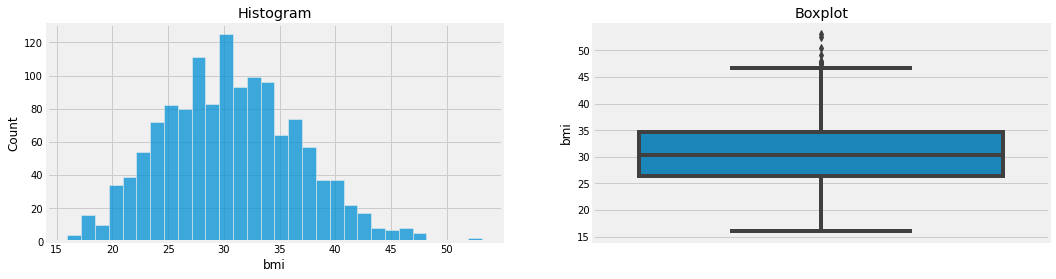


bmi - After Trimming


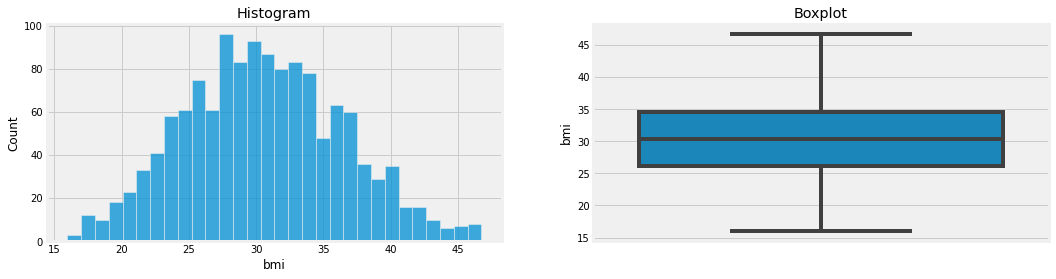

In [106]:
# Let's find outliers in `age`, `children`, `bmi`, 

print('age - Before Trimming')
diagnostic_plots(lin_df[num_feature_lin], 'age')
print('\nage - After Trimming')
diagnostic_plots(lin_df_trimmed, 'age')

print('\children - Before Trimming')
diagnostic_plots(lin_df[num_feature_lin], 'children')
print('\children - After Trimming')
diagnostic_plots(lin_df_trimmed, 'children')

print('\nbmi - Before Trimming')
diagnostic_plots(lin_df[num_feature_lin], 'bmi')
print('\nbmi - After Trimming')
diagnostic_plots(lin_df_trimmed, 'bmi')

#####5.1.2 Logistic Regression Dataset

In [107]:
'''
Dari hasil visualiasi outlier tampaknya terdapat cukup banyak outlier pada
beberapa variabel yang ada pada fitur numerik.

Menampilkan presentasi outlier pada variabel yang ada pada fitur numerik.

'''
 
for k, v in log_df[log_feature+target_log].items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(log_df[log_feature])[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column C outliers = 18.62%
Column A outliers = 5.71%
Column S outliers = 10.89%
Column G2 outliers = 0.03%
Column H outliers = 0.94%
Column GalaxyClass outliers = 100.00%


######HANDLING OUTLIER USING CAPPING

**Saya menggunakan capping untuk menghandle variabel yang mengandung outlier dengan presentase outlier diatas 3%**

Column C outliers = 18.62%

Column A outliers = 5.71%

Column S outliers = 10.89%

Column GalaxyClass outliers = 100.00%

In [108]:
!pip install feature-engine
from feature_engine.outliers import Winsorizer

# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['C', 'A', 'S', 'GalaxyClass'])

windsoriser.fit(log_df[log_feature+target_log])

log_df_t = windsoriser.transform(log_df[log_feature+target_log])

In [109]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'C': 0.07623785498487493, 'A': 0.598687253891875, 'S': 0.5599140226828748, 'GalaxyClass': 1.0}
Right Tail Caps :  {'C': 0.653820783957875, 'A': 1.0894346460708748, 'S': 1.087125808001875, 'GalaxyClass': 1.0}


In [110]:
print('Log Fitur Dataframe - Before Capping')
print(log_df[log_feature].describe())
print('')
print('Log Fitur Dataframe - After Capping')
print(log_df_t.describe())

Log Fitur Dataframe - Before Capping
                  C             A             S            G2             H
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000
mean   -1846.175115      0.323992     -3.220560      0.747130      0.655137
std     3880.385347     70.716614    199.980672     70.720857      0.113237
min    -9999.999999  -9999.999999  -9999.999999  -9999.999999      0.017008
25%        0.292831      0.782718      0.757618      0.979765      0.585356
50%        0.365902      0.859172      0.844121      1.364905      0.659603
75%        0.437227      0.905404      0.889421      1.606039      0.743029
max        0.761184      0.986535      0.979032      1.953389      0.929947

Log Fitur Dataframe - After Capping
                  C             A  ...             H  GalaxyClass
count  20000.000000  20000.000000  ...  20000.000000      20000.0
mean       0.338924      0.831843  ...      0.655137          1.0
std        0.144786      0.097535  ...      

C - Before Capping


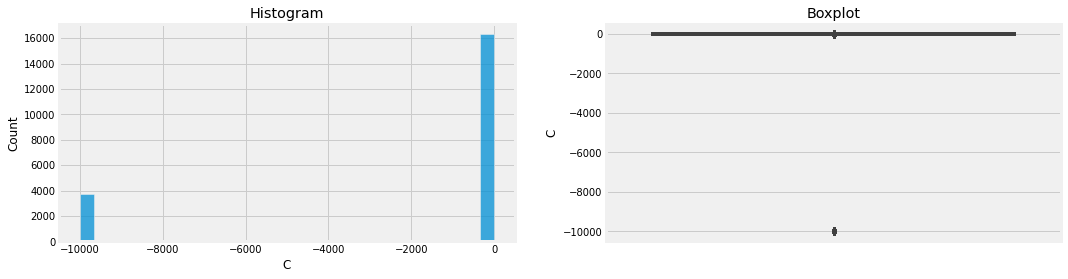

\C - After Capping


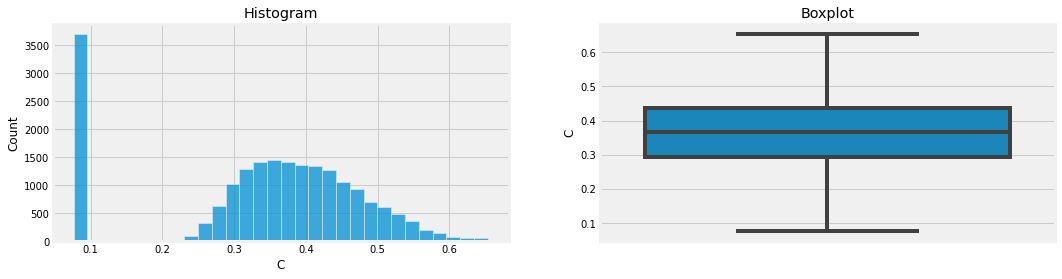

A - Before Capping


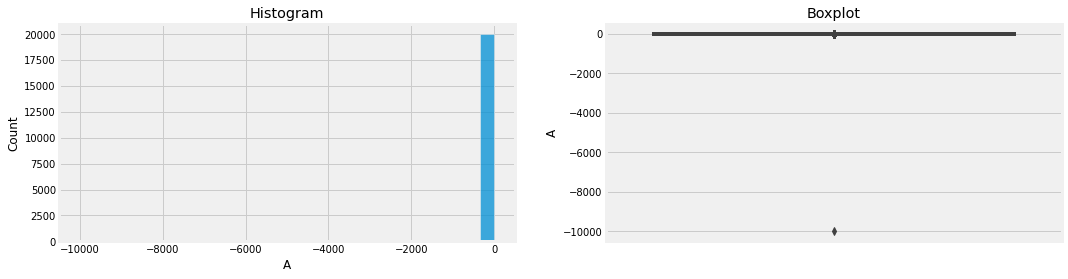

\A - After Capping


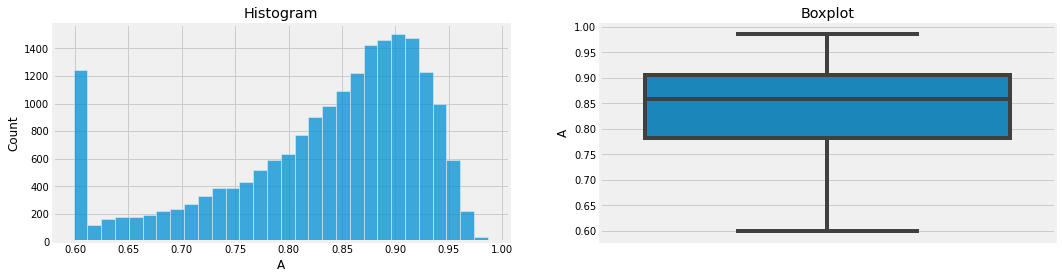

H - Before Capping


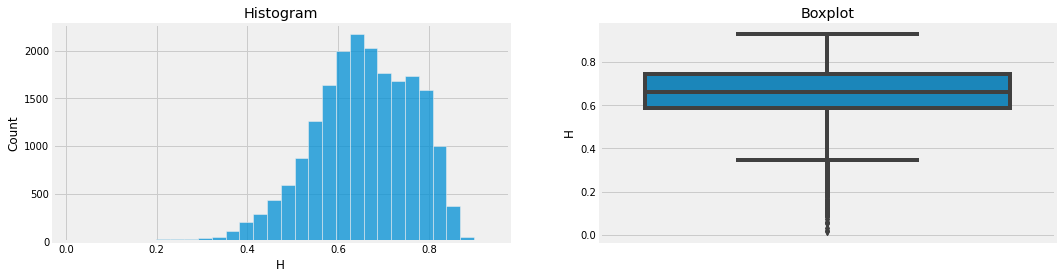

\H - After Capping


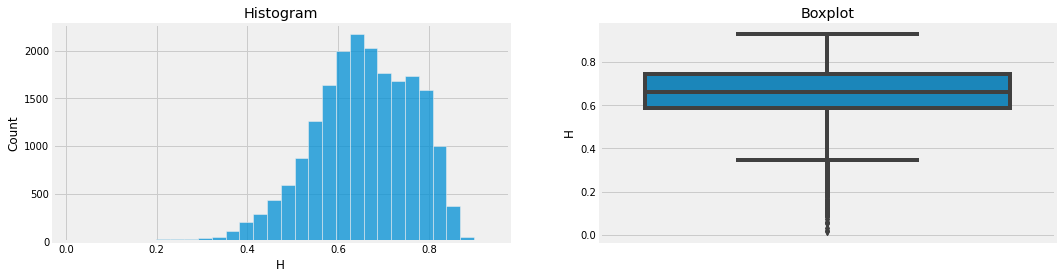

GalaxyClass - Before Capping


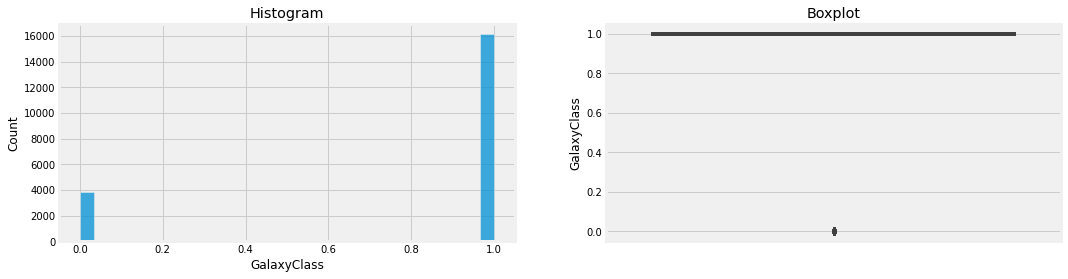

\GalaxyClass - After Capping


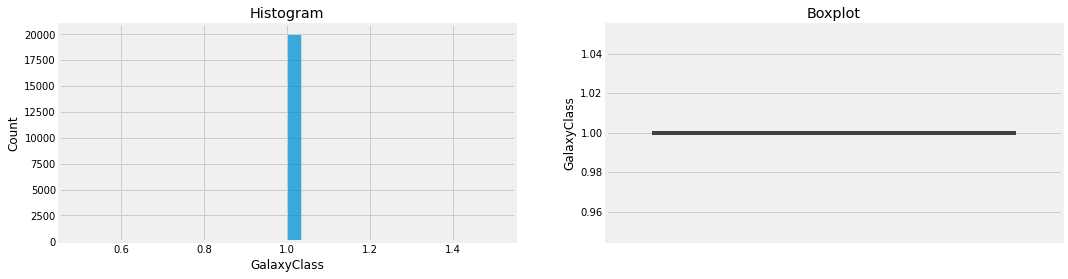

In [111]:
# Let's find outliers in `C`, `A`, `H`, `GalaxyClass`

print('C - Before Capping')
diagnostic_plots(log_df, 'C')
print('\C - After Capping')
diagnostic_plots(log_df_t, 'C')

print('A - Before Capping')
diagnostic_plots(log_df, 'A')
print('\A - After Capping')
diagnostic_plots(log_df_t, 'A')

print('H - Before Capping')
diagnostic_plots(log_df, 'H')
print('\H - After Capping')
diagnostic_plots(log_df_t, 'H')

print('GalaxyClass - Before Capping')
diagnostic_plots(log_df, 'GalaxyClass')
print('\GalaxyClass - After Capping')
diagnostic_plots(log_df_t, 'GalaxyClass')

######HANDLING OUTLIER USING TRIMMING

**Saya menggunakan trimming untuk menghandle variabel yang mengandung outlier dengan presentase outlier sama dengan dan dibawah 3%**

Column G2 outliers = 0.03%

Column H outliers = 0.94%

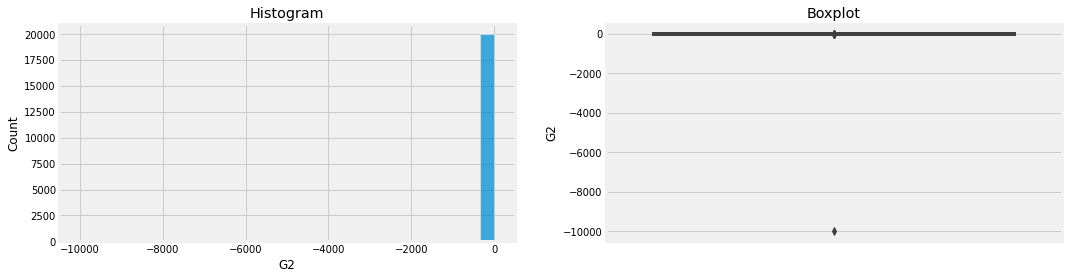

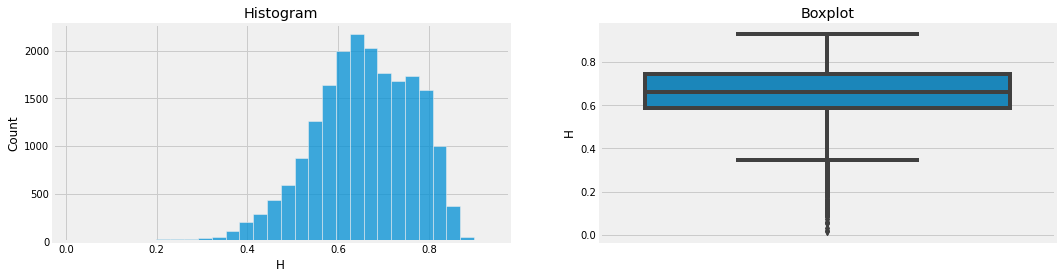

In [112]:
# Let's find outliers in `G2`, `windGust`, `temperatureMin`

diagnostic_plots(log_df, 'G2')
diagnostic_plots(log_df, 'H')

In [113]:
# Limits for `G2`
G2_upper_limit, G2_lower_limit = find_skewed_boundaries(log_df, 'G2', 1.5)
G2_upper_limit, G2_lower_limit

# Limits for `H`
H_upper_limit, H_lower_limit = find_skewed_boundaries(log_df, 'H', 1.5)
H_upper_limit, H_lower_limit

print('G2_upper_limit : ', G2_upper_limit)
print('G2_lower_limit : ', G2_lower_limit, '\n')
print('H_upper_limit : ', H_upper_limit)
print('H_lower_limit : ', H_lower_limit)

G2_upper_limit :  2.545450203126375
G2_lower_limit :  0.04035323112937517 

H_upper_limit :  0.979538708924875
H_lower_limit :  0.34884610772187497


In [114]:
# Flag the outliers in category `G2`
outliers_G2 = np.where(log_df['G2'] > G2_upper_limit, True,
                       np.where(log_df['G2'] < G2_lower_limit, True, False))

# Flag the outliers in category `H`
outliers_H = np.where(log_df['H'] > H_upper_limit, True,
                       np.where(log_df['H'] < H_lower_limit, True, False))

print(outliers_G2[:10])

[False False False False False False False False False False]


In [115]:
# Let's trimm the dataset

log_df_trimmed = log_df.loc[~(outliers_G2 + outliers_H)]
print('Size dataset - Before trimming : ', log_df.shape)
print('Size dataset - After trimming  : ', log_df_trimmed.shape)

Size dataset - Before trimming :  (20000, 9)
Size dataset - After trimming  :  (19810, 9)


setelah ditrim variabel pada fitur numerik menghilangkan 190 data atau sekitar 0,95% data dari dataset yang digunakan.

G2 - Before Trimming


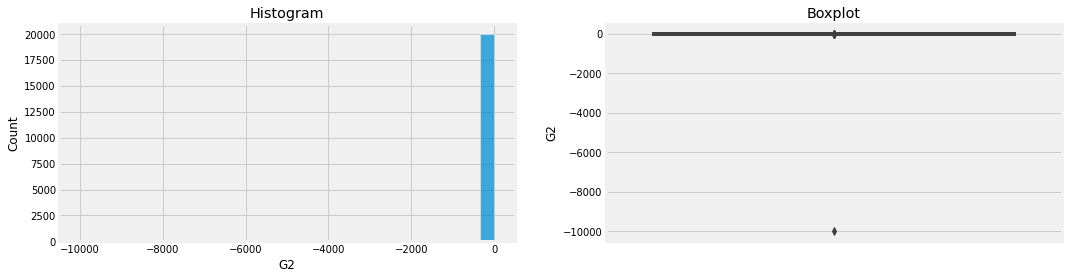


G2 - After Trimming


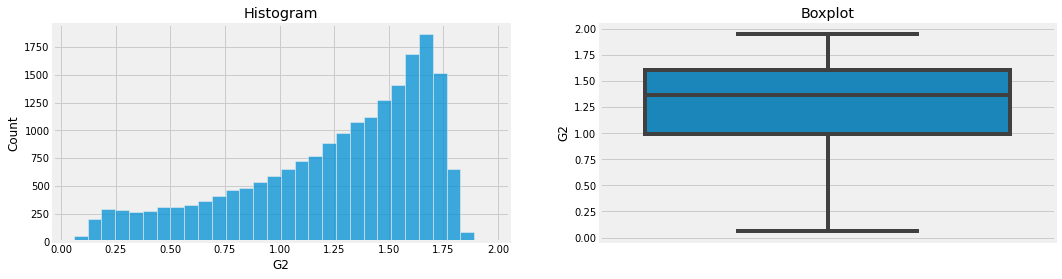

\H - Before Trimming


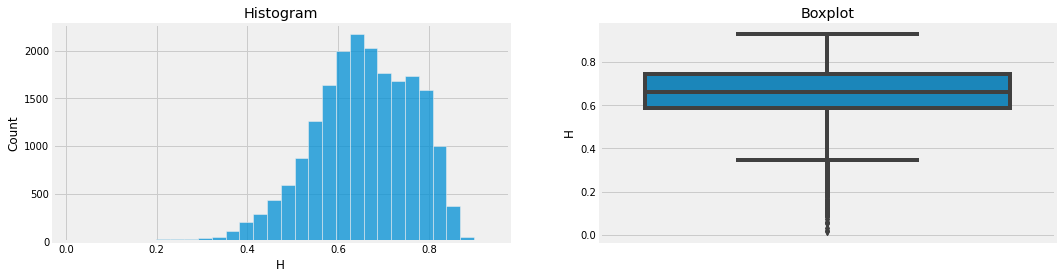

\H - After Trimming


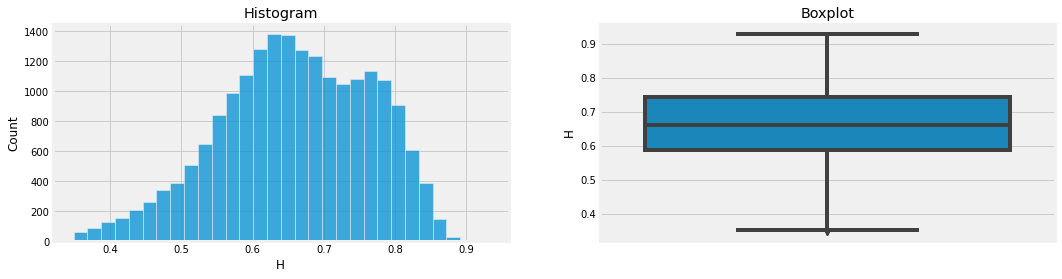

In [116]:
# Let's find outliers in `G2`, `H` 

print('G2 - Before Trimming')
diagnostic_plots(log_df[log_feature], 'G2')
print('\nG2 - After Trimming')
diagnostic_plots(log_df_trimmed, 'G2')

print('\H - Before Trimming')
diagnostic_plots(log_df[log_feature], 'H')
print('\H - After Trimming')
diagnostic_plots(log_df_trimmed, 'H')

###5.2 SPLIT DATA

#####5.2.1 Linear Regression **Dataset**

In [157]:
num_feature_lin = lin_df_trimmed[num_feature_lin].drop(columns = ['bmi'])

In [161]:
X_num = num_feature_lin
y = lin_df_trimmed.bmi

In [162]:
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size = 0.20, random_state = 42)

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

In [164]:
X_cat = lin_df_trimmed[cat_feature_lin]
y = lin_df_trimmed.bmi

In [165]:
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size = 0.20, random_state = 42)

In [166]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe.fit(X_train_cat)
X_train_cat = oe.fit_transform(X_train_cat)
X_test_cat = oe.transform(X_test_cat)

#####5.2.1 Log Regression Dataset

In [129]:
X = log_df_trimmed[log_feature]
y = log_df_trimmed.GalaxyClass

In [136]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_log)
X_train_log = scaler.transform(X_train_log)
X_test_log = scaler.transform(X_test_log)

#6. PENDEFINISIAN MODEL

###6.1 LINEAR REGRESSION

In [167]:
processed_data_train = np.concatenate([X_train_num, X_train_cat], axis=1)
X_train_lin = processed_data_train
X_train_lin

array([[ 1.12560968, -0.88947791, -0.21584443,  1.        ,  0.        ,
         1.        ],
       [ 0.70075831, -0.88947791, -0.42383427,  1.        ,  0.        ,
         3.        ],
       [ 0.20509837, -0.88947791, -0.57097033,  1.        ,  0.        ,
         1.        ],
       ...,
       [-0.9986472 , -0.05935059, -0.8346236 ,  0.        ,  0.        ,
         3.        ],
       [-1.49430714, -0.88947791, -1.00765957,  1.        ,  0.        ,
         2.        ],
       [-0.78622151, -0.88947791,  0.54345473,  1.        ,  0.        ,
         1.        ]])

In [168]:
processed_data_test = np.concatenate([X_test_num, X_test_cat], axis=1)
X_test_lin = processed_data_test
X_test_lin

array([[-1.42349857, -0.88947791, -0.92597752,  0.        ,  0.        ,
         1.        ],
       [ 1.4796525 , -0.88947791,  1.42955533,  1.        ,  0.        ,
         0.        ],
       [-1.49430714, -0.88947791, -0.96023896,  1.        ,  0.        ,
         0.        ],
       ...,
       [ 1.05480112, -0.88947791, -0.27871969,  1.        ,  0.        ,
         3.        ],
       [-0.4321787 , -0.05935059, -0.70314678,  0.        ,  0.        ,
         2.        ],
       [ 0.77156687, -0.88947791, -0.39654924,  1.        ,  0.        ,
         2.        ]])

In [169]:
from sklearn.linear_model import LinearRegression

#fitting training data to model
lr = LinearRegression()
lr.fit(X_train_lin, y_train)

LinearRegression()

###6.2 LOGISTIC REGRESSION

In [148]:
from sklearn.linear_model import LogisticRegression

#fitting training data to model
logr = LogisticRegression()
logr.fit(X_train_log, y_train_log)

LogisticRegression()

#7. PELATIHAN MODEL

###7.1 LINEAR REGRESSION

In [170]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#predicting r2 score from training data
y_pred_linear_train = lr.predict(X_train_lin)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)


#predicting r2 score from test data
y_pred_linear_test = lr.predict(X_test_lin)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear_test)

# #predicting mae score from test data
# mae_linear_test = mean_absolute_error(y_test, y_pred_linear_test)
# print("MAE: ", mae_linear_test)

R2_score (train):  0.12652588487737404
R2_score (test):  0.14251485778587614
RMSE:  5.478563100850782


###7.2 LOGISTIC REGRESSION

In [173]:
y_pred = logr.predict(X_test_log)

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test_log, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.21      0.31       784
           1       0.83      0.96      0.89      3178

    accuracy                           0.82      3962
   macro avg       0.71      0.59      0.60      3962
weighted avg       0.79      0.82      0.78      3962



#8. MODEL INFERENCE

###8.1 LINEAR REGRESSION

In [154]:
lin_df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [171]:
pred_data_num = [[21, 2, 17224.211]]
num = scaler.transform(pred_data_num)

pred_data_cat = [['female', 'no', 'southwest']]
cat = oe.transform(pred_data_cat)

In [172]:
predict_data = np.concatenate([num, cat], axis=1)
result = lr.predict(predict_data)
result

array([34.68778096])

###8.2 LOGISTIC REGRESSION

In [182]:
X.head(1)

,C,A,S,G2,H
0,0.357051,0.932151,0.850992,1.588183,0.697214


In [192]:
pred_data = [[0.342323, 0.732323, 0.645345, 0.328328, 0.723283]]
scr = scaler.transform(pred_data)
result = logr.predict(scr)
result

array([1])

#9. KESIMPULAN

###9.1 LINEAR REGRESSION

#####MODEL ANALYSIS

In [ ]:
'''
Dari data yang sudah disiapkan dan model yang dibangun menghasilkan:

R2_score (train):  0.12652588487737404
R2_score (test):  0.14251485778587614
RMSE:  5.478563100850782

Setelah digunakan untuk memprediksi data baru, didapatkan nilai bmi sebesar:
34.68778096

'''

#####EDA ANALYSIS

Dari hasil visualisasi tampaknya:
*   Distribusi data pada variabel **age** dan **bmi** tampaknya memiliki distribusi data normal. Distribusi data pada variabel **children** dan **charges** memiliki distribusi data yang agak miring/skewed.
*   Dari hasil distribusi data tampaknya variabel bmi dan charges mengandung outlier

**Kolom charges memiliki skor korelasi yang cukup dengan bmi dan merupakan indikasi yang baik untuk digunakan sebagai prediktor.** Kemudian disusul oleh nilai dari variabel age dan children.

###9.2 LOGISTIC REGRESSION

#####MODEL ANALYSIS

In [ ]:
'''
precision    recall  f1-score   support

           0       0.59      0.21      0.31       784
           1       0.83      0.96      0.89      3178

    accuracy                           0.82      3962
   macro avg       0.71      0.59      0.60      3962
weighted avg       0.79      0.82      0.78      3962

Setelah digunakan untuk memprediksi data baru, didapatkan bahwa data baru
terprediksi sebagai:

1 atau Galaksi Spiral

'''

#####EDA ANALYSIS

Dari hasil visualisasi tampaknya:
*   Distribusi data pada variabel **A, S, G2 dan H** memiliki distribusi data yang miring/skewed. Distribusi data pada variabel C adalah bimodel.
*   Dari hasil distribusi data tampaknya semua variabel mengandung outlier

**Kolom H dan C memiliki skor korelasi yang cukup dengan GalaxyClass dan merupakan indikasi yang baik untuk digunakan sebagai prediktor.** Kemudian disusul oleh nilai dari variabel A, G2 dan S.